In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trips = pd.read_csv('data/trips.csv')
trips

,activityid,personid,modechoice
0,1,3,WALK
1,2,3,WALK
2,3,3,WALK
3,4,3,WALK
4,5,3,WALK
...,...,...,...
14047024,17147588,4113994,DRIVE_ALONE_FREE
14047025,17147589,4113994,DRIVE_ALONE_FREE
14047026,17147590,4113994,DRIVE_ALONE_FREE
14047027,17147592,4113995,SHARED_3_HOV


In [4]:
utility = pd.read_csv('data/utilityvars.csv')
utility

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
0,12150818,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,...,0.0,46.447229,46.447229,46.447229,0,5,True,False,False,1
1,3018709,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,...,0.0,495.225231,495.225231,495.225231,0,1,False,False,False,1
2,8809200,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,...,0.0,462.137117,462.137117,462.137117,0,1,False,False,True,1
3,11332534,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,...,0.0,342.291418,342.291418,342.291418,0,1,False,False,False,1
4,6130767,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,...,0.0,310.186071,310.186071,310.186071,0,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,10138525,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,...,0.0,842.672156,842.672156,842.672156,5,5,False,False,False,5
14047025,16270294,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,...,0.0,13.350623,13.350623,13.350623,5,3,False,False,False,3
14047026,16270295,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,...,0.0,137.377041,137.377041,137.377041,5,3,False,False,False,3
14047027,10138526,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,...,0.0,5.447711,5.447711,5.447711,5,5,False,False,False,3


## Exploratory Data Analysis

In [5]:
trips.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [6]:
utility.dtypes.unique()

array([dtype('int64'), dtype('bool'), dtype('float64')], dtype=object)

In [7]:
# check for problem features and missing data
for col in list(trips):
    print(col,':',trips[col].unique())

activityid : [       1        2        3 ... 17147590 17147592 17147593]
personid : [      3       4       5 ... 4113993 4113994 4113995]
modechoice : ['WALK' 'SHARED_2_HOV' 'DRIVE_ALONE_FREE' 'SCH_BUS' 'SHARED_3_HOV'
 'WALK_SET' 'BIKE' 'KNR_SET' 'PNR_SET' 'DRIVE_ALONE_PAY' 'SHARED_2_PAY'
 'SHARED_3_PAY']


In [8]:
# check for problem features and missing data
for col in list(utility):
    print(col,':',utility[col].unique())

activityid : [12150818  3018709  8809200 ... 16270295 10138526 10138527]
age : [4 6 7 2 3 1 0]
gender : [ True False]
autosuf : [2 1 0]
numhouseholdpersons : [ 2  6  1  3  4  5  7  8  9 10]
income : [4 1 3 2 5]
oduden : [ 9.63319969  8.3046999  10.18949986 ... 62.67900085 58.9233017
 31.80550003]
oempden : [  11.59405804   70.11791229   47.53874588 ...  658.33776855  254.5579834
 1974.05187988]
ototint : [ 4. 12.  3.  1.  2.  6. 13. 11. 10. 25. 23. 14.  9. 24. 22. 26. 15.  8.
 27.  5. 16.  7. 18. 20. 17. 21. 19.]
dempden : [  67.65913391   32.27333832   13.56715679 ...  254.5579834     6.26534557
 1974.05187988]
sovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
hovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tolldrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tollcostsov : [  0.         160.26133728 201.02601624 ... 193.25448608 171.62652588
 214.60983276

## Data Cleaning

In [48]:
# combine both tables on acitvityid 
util_trip = utility.join(trips.set_index('activityid'), on='activityid')
util_trip

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode,personid,modechoice
0,12150818,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,...,46.447229,46.447229,0,5,True,False,False,1,2382494,DRIVE_ALONE_FREE
1,3018709,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,...,495.225231,495.225231,0,1,False,False,False,1,583761,DRIVE_ALONE_FREE
2,8809200,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,...,462.137117,462.137117,0,1,False,False,True,1,1724631,DRIVE_ALONE_FREE
3,11332534,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,...,342.291418,342.291418,0,1,False,False,False,1,2219806,DRIVE_ALONE_FREE
4,6130767,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,...,310.186071,310.186071,0,1,False,False,False,1,1198716,DRIVE_ALONE_FREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,10138525,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,...,842.672156,842.672156,5,5,False,False,False,5,1984999,SHARED_3_HOV
14047025,16270294,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,...,13.350623,13.350623,5,3,False,False,False,3,3197700,SHARED_3_HOV
14047026,16270295,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,...,137.377041,137.377041,5,3,False,False,False,3,3197700,SHARED_3_HOV
14047027,10138526,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,...,5.447711,5.447711,5,5,False,False,False,3,1984999,SHARED_3_HOV


In [49]:
# drop columns with no significant values (e.g. only 1 value, only unique values)
util_trip = util_trip.drop(columns=['activityid','personid'])
util_trip

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,...,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode,modechoice
0,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,5.053318,...,46.447229,46.447229,46.447229,0,5,True,False,False,1,DRIVE_ALONE_FREE
1,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,31.226185,...,495.225231,495.225231,495.225231,0,1,False,False,False,1,DRIVE_ALONE_FREE
2,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,30.145569,...,462.137117,462.137117,462.137117,0,1,False,False,True,1,DRIVE_ALONE_FREE
3,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,24.318232,...,342.291418,342.291418,342.291418,0,1,False,False,False,1,DRIVE_ALONE_FREE
4,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,25.267041,...,310.186071,310.186071,310.186071,0,1,False,False,False,1,DRIVE_ALONE_FREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,56.546418,...,842.672156,842.672156,842.672156,5,5,False,False,False,5,SHARED_3_HOV
14047025,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,1.403090,...,13.350623,13.350623,13.350623,5,3,False,False,False,3,SHARED_3_HOV
14047026,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,12.287907,...,137.377041,137.377041,137.377041,5,3,False,False,False,3,SHARED_3_HOV
14047027,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,1.173692,...,5.447711,5.447711,5.447711,5,5,False,False,False,3,SHARED_3_HOV


In [50]:
# define categorical variables
util_trip['gender'] = np.where(util_trip['gender'] == True, 'female', 'male')

util_trip['autosuf'] = np.where(util_trip['autosuf'] == 0, 'no_vehicles', 
                                np.where(util_trip['autosuf'] == 1, 'insufficient', 'sufficient'))

util_trip['tourpurpose'] = np.where(util_trip['tourpurpose'] == 0, 'work', \
                                    np.where(util_trip['tourpurpose'] == 1, 'university', \
                                    np.where(util_trip['tourpurpose'] == 2, 'school', \
                                    np.where(util_trip['tourpurpose'] == 3, 'maintenance', \
                                    np.where(util_trip['tourpurpose'] == 4, 'escort', \
                                    np.where(util_trip['tourpurpose'] == 5, 'discretionary', \
                                    np.where(util_trip['tourpurpose'] == 6, 'work-based', 'cross-border')))))))
                                    
    
util_trip['tourmode'] = np.where(util_trip['tourmode'] == 1, 'drive_alone_free', \
                                np.where(util_trip['tourmode'] == 3, 'hov2',\
                                np.where(util_trip['tourmode'] == 5, 'hov3',\
                                np.where(util_trip['tourmode'] == 7, 'walk',\
                                np.where(util_trip['tourmode'] == 8, 'bike',\
                                np.where(util_trip['tourmode'] == 9, 'walk_to_transit',\
                                np.where(util_trip['tourmode'] == 10, 'park_ride',\
                                np.where(util_trip['tourmode'] == 11, 'kiss_ride','school_bus'))))))))

# util_trip['targettripmode'] = np.where(util_trip['targettripmode'] == 1, 'drive_alone_free', \
#                                 np.where(util_trip['targettripmode'] == 2, 'drive_alone_pay',\
#                                 np.where(util_trip['targettripmode'] == 3, 'hov2_free',\
#                                 np.where(util_trip['targettripmode'] == 4, 'hov2_pay',\
#                                 np.where(util_trip['targettripmode'] == 5, 'hov3_free',\
#                                 np.where(util_trip['targettripmode'] == 6, 'hov3_pay',\
#                                 np.where(util_trip['targettripmode'] == 7, 'walk',\
#                                 np.where(util_trip['targettripmode'] == 8, 'bike',\
#                                 np.where(util_trip['targettripmode'] == 9, 'walk_to_transit',\
#                                 np.where(util_trip['targettripmode'] == 10, 'park_ride',\
#                                 np.where(util_trip['targettripmode'] == 11, 'kiss_ride','school_bus')))))))))))

In [51]:
util_trip.dtypes

age                        int64
gender                    object
autosuf                   object
numhouseholdpersons        int64
income                     int64
oduden                   float64
oempden                  float64
ototint                  float64
dempden                  float64
sovdrivetime             float64
hovdrivetime             float64
tolldrivetime            float64
tollcostsov              float64
tollcosthov2             float64
tollcosthov3             float64
walkttime                float64
walktotransitutility     float64
drivetotransitutility    float64
parkingcost              float64
parkingwalktime          float64
sovcost                  float64
hovcost                  float64
tollcost                 float64
tourpurpose               object
tourmode                  object
firststop                   bool
laststop                    bool
zerototalstops              bool
targettripmode             int64
modechoice                object
dtype: obj

In [32]:
for col in list(util_trip):
    print(col,':',util_trip[col].value_counts())

age : 7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64
numhouseholdpersons : 2     3478939
4     2840701
3     2466820
5     1917514
1     1273335
6     1135600
8      569690
9      262962
7       90472
10      10996
Name: numhouseholdpersons, dtype: int64
income : 3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64
oduden : 5.558900     81383
10.986600    48101
3.956300     44700
7.538500     42778
2.540700     29732
             ...  
40.804199        1
35.840401        1
15.664600        1
0.013700         1
49.155701        1
Name: oduden, Length: 20621, dtype: int64
oempden : 10.919112       81383
43.163792       48101
23979.982422    44700
35.341751       42619
144.660065      29732
                ...  
46.521439           1
51.334843           1
29.418196           1
492.697784          1
263.858917          1
Name: oempden, Length: 21737, dtype: int64
ototint : 1.0     180

In [37]:
# visualize distribution of each variable
# currently takes too long
num_vars = [col for col in list(util_trip) if util_trip[col].dtype in ['int64', 'float64']]
for col in num_vars:
    util_trip[col].plot.hist(bins=len(util_trip[col].unique()), alpha=0.5)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x2d8d44200>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/transforms.py", line 200, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11053ea70> (for post_execute):


KeyboardInterrupt: 

In [60]:
# define response, categorical, and numerical variables 
Y = util_trip['targettripmode'] - 1

X1 = util_trip.select_dtypes(include=['object','bool'])
X2 = util_trip.select_dtypes(exclude=['object','bool']).drop(columns='targettripmode')
Y

0           0
1           0
2           0
3           0
4           0
           ..
14047024    4
14047025    2
14047026    2
14047027    2
14047028    4
Name: targettripmode, Length: 14047029, dtype: int64

In [61]:
# show table with expanded categorical columns
expanded_data = []

for col in X1.columns:
    dummies = pd.get_dummies(X1[col], prefix=col)
    expanded_data.append(dummies)

expanded_data = pd.concat(expanded_data, axis=1)
expanded_data

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,modechoice_DRIVE_ALONE_PAY,modechoice_KNR_SET,modechoice_PNR_SET,modechoice_SCH_BUS,modechoice_SHARED_2_HOV,modechoice_SHARED_2_PAY,modechoice_SHARED_3_HOV,modechoice_SHARED_3_PAY,modechoice_WALK,modechoice_WALK_SET
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14047025,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14047026,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14047027,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# all variables with expanded categorical variables
data_encoded = pd.concat([expanded_data, X2, Y], axis=1)
data_encoded

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
0,1,0,0,0,1,0,0,0,0,0,...,0.0,10.677524,-999.0,-999.0,0.0,0.0,46.447229,46.447229,46.447229,0
1,0,1,0,0,1,0,0,0,0,0,...,0.0,113.844883,-999.0,-999.0,0.0,0.0,495.225231,495.225231,495.225231,0
2,0,1,0,0,1,0,0,0,0,0,...,0.0,106.238420,-999.0,-999.0,0.0,0.0,462.137117,462.137117,462.137117,0
3,0,1,0,0,1,0,0,0,0,0,...,0.0,78.687684,-999.0,-999.0,0.0,0.0,342.291418,342.291418,342.291418,0
4,0,1,0,0,1,0,0,0,0,0,...,0.0,71.307144,-999.0,-999.0,0.0,0.0,310.186071,310.186071,310.186071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,...,0.0,193.717741,-999.0,-999.0,0.0,0.0,842.672156,842.672156,842.672156,4
14047025,0,1,0,0,1,0,1,0,0,0,...,0.0,3.069109,-999.0,-999.0,0.0,0.0,13.350623,13.350623,13.350623,2
14047026,0,1,0,0,1,0,1,0,0,0,...,0.0,31.580930,-999.0,-999.0,0.0,0.0,137.377041,137.377041,137.377041,2
14047027,1,0,0,0,1,0,1,0,0,0,...,0.0,1.252347,-999.0,-999.0,0.0,0.0,5.447711,5.447711,5.447711,2


In [63]:
# use weights on tourmode, which will weight more on walk time - could show how much more inconvenient it is to walk/not
subset = data_encoded.sample(n=10000, weights='walkttime', random_state=1)
subset

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
5765990,0,1,0,0,1,0,1,0,0,0,...,0.0,28.562361,-999.000000,-999.0,0.000000,0.0,124.246268,124.246268,124.246268,2
10197295,0,1,0,0,1,0,0,0,0,0,...,0.0,211.870977,-999.000000,-999.0,0.000000,0.0,921.638728,921.805627,921.638728,0
714,0,1,1,0,0,0,0,0,0,1,...,0.0,18.620626,-999.000000,-999.0,0.000000,0.0,80.999723,80.999723,80.999723,0
3921242,1,0,1,0,0,1,0,0,0,0,...,0.0,15.096169,-2.632533,-999.0,0.000000,0.0,65.668333,65.668333,65.668333,0
1679428,0,1,0,0,1,0,0,0,0,0,...,0.0,6.250036,-999.000000,-999.0,49.114538,0.0,27.187656,27.187656,27.187656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653899,0,1,1,0,0,0,0,1,0,0,...,0.0,65.624589,-999.000000,-999.0,0.000000,0.0,285.466955,285.466955,285.466955,2
6040894,1,0,0,0,1,0,0,1,0,0,...,0.0,26.991498,-999.000000,-999.0,0.000000,0.0,117.413014,117.413014,117.413014,4
3517662,1,0,1,0,0,0,0,0,0,0,...,0.0,31.766053,-999.000000,-999.0,0.000000,0.0,138.182327,138.182327,138.182327,0
9821973,0,1,1,0,0,0,0,0,0,0,...,0.0,95.860033,-999.000000,-999.0,0.000000,0.0,416.991133,416.991133,416.991133,0


In [64]:
# rearrange into data array for training
data_array = subset.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

[[  0.           1.           0.         ... 124.24626778 124.24626778
  124.24626778]
 [  0.           1.           0.         ... 921.63872845 921.80562703
  921.63872845]
 [  0.           1.           1.         ...  80.99972274  80.99972274
   80.99972274]
 ...
 [  1.           0.           1.         ... 138.18232702 138.18232702
  138.18232702]
 [  0.           1.           1.         ... 416.99113341 416.99113341
  416.99113341]
 [  0.           1.           0.         ... 134.84059739 134.84059739
  134.84059739]]
[2. 0. 0. ... 0. 0. 4.]


## Model Building

In [65]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 61)
(2000, 61)
(8000,)
(2000,)


In [67]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softmax',eval_metric='auc',use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

[04:16:19] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:20] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:20] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:21] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:21] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:21] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:22] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:22] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset cont

[04:16:41] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:41] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:42] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:42] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[04:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:307: Dataset cont

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [68]:
xgb_model.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.970573,
                0.973135,
                0.974466,
                0.976081,
                0.977702,
                0.978896,
                0.979763,
                0.980494,
                0.981734,
                0.98265,
                0.983546,
                0.98455,
                0.98518,
                0.98574,
                0.98625,
                0.987321,
                0.98817,
                0.988616,
                0.988823,
                0.989402,
                0.989868,
                0.9903,
                0.990602,
                0.991073,
                0.991677,
                0.992115,
                0.992667,
                0.992938,
                0.993512,
                0.993886,
                0.99447,
                0.994649,
                0.994966,
                0.995464,
                0.99576,
                0.996128,
                0.996301,
          

## Evaluation

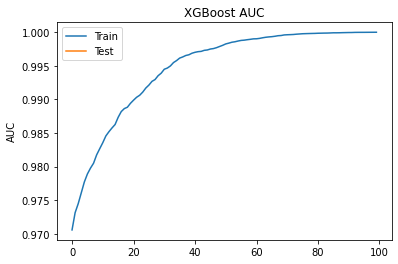

In [69]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()